# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 20th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups
- Problem 1 + Problem 2 = 75 points ; Problem 3 = 25 points
- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans
from gap_statistic import OptimalK
#from sklearn.datasets.samples_generator import make_blobs


<hr style="height:2pt">

<div class="theme">*Handy* Algorithms </div>


    
In this assignment, you will be working with data collected from a motion capture camera system. The system was used to record 14 different users performing 5 distinct hand postures with markers attached to a left-handed glove. A set of markers on the back of the glove was used to establish a local coordinate system for the hand, and 8 additional markers were attached to the thumb and fingers of the glove. A total of 24 features were collected based on observations from the camera system. Two other variables in the dataset were the ID of the user and the posture that the user made.

These data have been preprocessed, including transformation to the local coordinate system of the record, removal of outliers, and removal of missing data.

The dataset `postures_clean.csv` contains 38,943 rows and 26 columns. Each row corresponds to a single frame as captured by the camera system. The data are represented in the following manner:

`Class (type: Integer). The hand posture of the given observation, with`

`1 = Fist (with thumb out)`

`2 = Stop (hand flat)`

`3 = Point1 (point with index finger)`

`4 = Point2 (point with index and middle fingers)`

`5 = Grab (fingers curled as if to grab)`

`User (type: Integer). The ID of the user that contributed the record.`

`X0, Y0, Z0, X1, Y1, Z1,..., X7, Y7, Z7 (type: Real). The x-coordinate, y-coordinate, and z-coordinate of the eight unlabeled marker positions.`


Start by reading the dataset into a pandas data frame.

In [3]:
#your code here
df = pd.read_csv("./data/postures_clean.csv")
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553
2,1,0,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,...,-67.660208,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279
3,2,0,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,...,-74.307346,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147
4,2,0,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,...,-71.629823,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243


In [4]:
# df.dtypes

In [5]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,-18.446645,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,35.597032,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-157.199089,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,-45.169035,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,-14.823751,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,9.382799,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967


In [6]:
# for column in df.columns:
#     uniques = sorted(df[column].unique())
#     empty = len(df[df[column] == '']) 
#     print('{0:25s} {1:5d} {2:5d}\t'.format(column, len(uniques), empty) , uniques[:5])

<div class='exercise'>Problem 1: Clustering with k-means </div>

(a) After appropriate pre-processing (but not scaling) run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to the number of users, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster14` to your data frame.

In [7]:
df_post = df.iloc[:,2:]

In [8]:
ms_kmeans = KMeans(n_clusters=14, init='random', n_init=46, random_state=109).fit(df_post)
df_post['Cluster14'] = ms_kmeans.labels_

(b) Use the function below to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 14 clusters seem to make sense?

In [9]:
from sklearn.decomposition import PCA

def plot_clusters(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5', 'db_cluster'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_columns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index ### New statement
    
    # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[pca_sample.index, "Cluster14"]
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[pca_sample.index, "Cluster5"]
    if 'db_cluster' in full_data.columns.values:
        pca_sample['db_cluster'] = full_data.loc[pca_sample.index, "db_cluster"]
    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

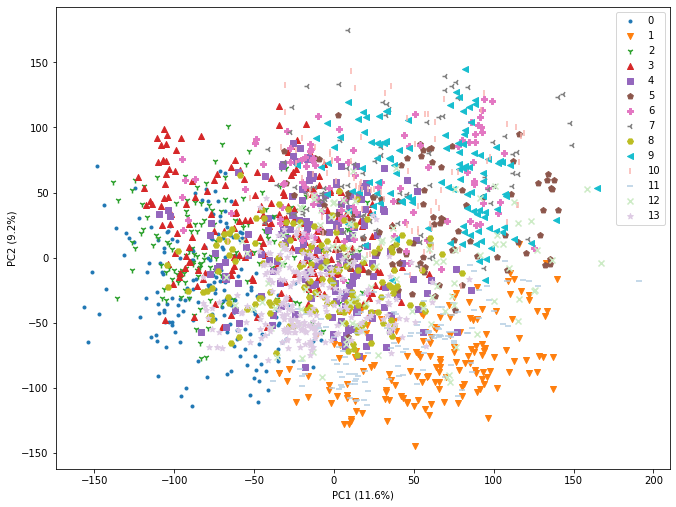

In [10]:
#your code here
plot_clusters(df_post, 'Cluster14', False)

It seems that the clustering captured some kind of features for 14 different users, however, the overall clustering is poorly performed. Based on the figure above, we can see that different clusters are located very close to each other, which makes no sense to put them into different clusters. One possible explanation is that the PCA 1&2 doesn't really reflect the high dimension distribution. In another perspective, 14 clusters doesn't make sense because the similarity among the same users should be smaller than the similarity among the same postures, so it is better to make 5 clusters rather than 14 clusters.

(c) Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 14, the average silhouette_score is 0.06636646744790159.


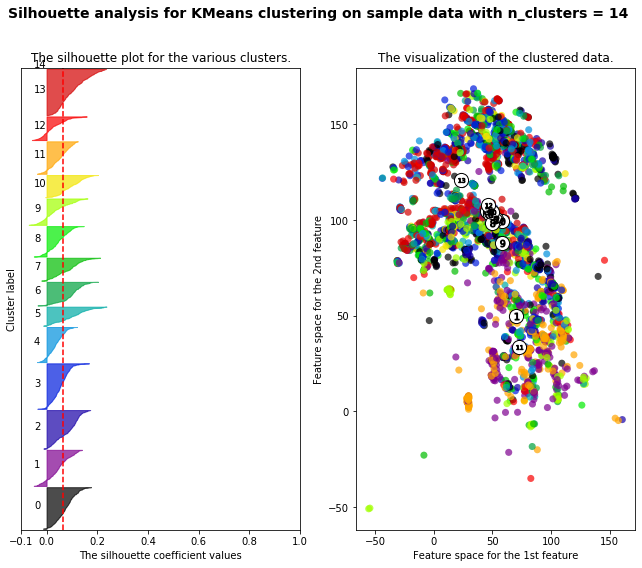

In [12]:
#your code here
df_post_10 = df_post.sample(frac=0.1, random_state=109)
silplot(df_post_10.iloc[:,:-1].values, df_post_10.iloc[:,-1], ms_kmeans)

Based on the silhouette score and silhousette plot, we can see that the 13 out of 14 clusters have some partions of data are negative, which indicates the clustering doesn't really perform well. Besides, the figure on the right hand side indicate the 14 clusters are indistinguishable in the first and second feature space, and the centroids for each cluster are also very close to each other, whcich may explain why the average silfouette score are pretty low. Comparing the right figure with the previous figure, we can see that even the clustering does't perform well, each cluster is still more distinguishable in the first and the second PCA spaces, rather than the first and the second feature space.

(d) Repeat all of the above steps, but attempting to group by posture rather than by user. That is : 

(i) Run the k-means algorithm with 5 centroids instead of 14, creating a variable named `Cluster5` and adding it to the dataset. 

(ii) Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

In [13]:
df_post = df.iloc[:,2:]
ms_kmeans = KMeans(n_clusters=5, init='random', n_init=46, random_state=109).fit(df_post)
df_post['Cluster5'] = ms_kmeans.labels_

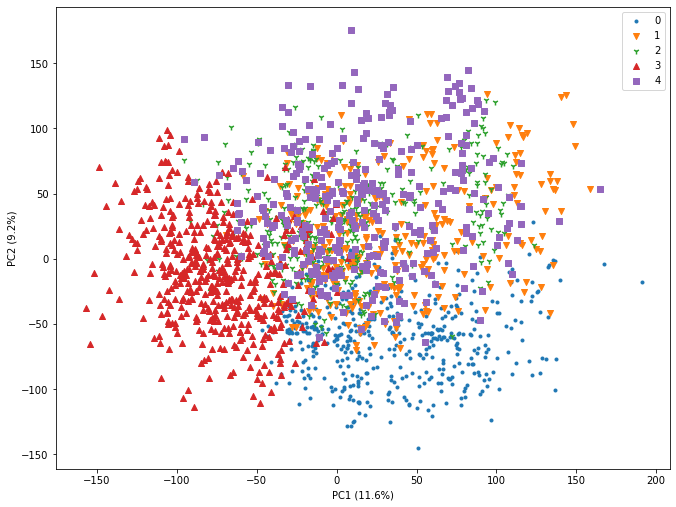

In [14]:
plot_clusters(df_post, 'Cluster5', False)

From the figure above, we can see that different clusters have been separated, especially for cluster 0 and 3. Other clusters are still mixed together, as the previous clustering based on 14 clusters, this may be caused due to the high dimension of the data so that it is hard to separate them in the first and second dimension of PCA. Still, compared with the 14 clusters' results, it looks better.

For n_clusters = 5, the average silhouette_score is 0.07001183350086952.


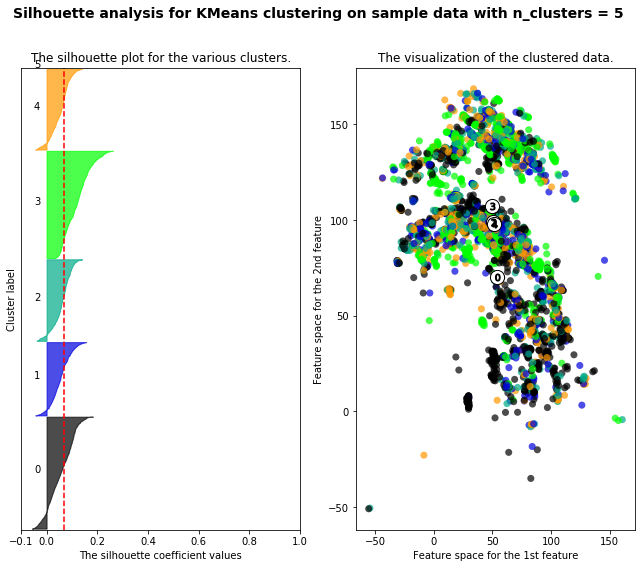

In [15]:
df_post_10 = df_post.sample(frac=0.1, random_state=109)
silplot(df_post_10.iloc[:,:-1].values, df_post_10.iloc[:,-1], ms_kmeans)

The average silhouette score is 0.07 for the 5 cluster results, which is slightly better than the previous 14 clusters. However, the sihouette plot shows there are also some partions of data in each cluster have negative values. The visualization on the right is still a mixture of different clusters in the span space of the first two features, which could not help us distinguish the difference between different clusters.

(e) What do the results suggest? Does this make sense in the context of what we know about the problem?

The results suggest that the 5 clusters is a more reasonable choice compared with 14 clusters, and the visualization on PCA 1&2 space has confirmed that the results are better in 5 clusters. It is reasonable to use 5 clusters rather than 14 clusters, since the similiarity among 5 kinds of gestures should be higher than the similiarity among 14 each users.

<div class='exercise'> <b> Problem 2: Other Ks  </b> </div>

In the previous problem, we examined the results of running k-means with 5 and 14 centroids on the postures data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

(a) Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,15\}.$
 

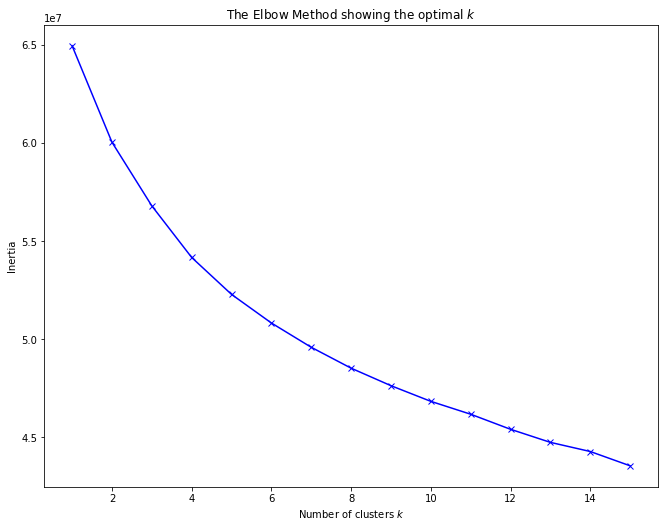

In [16]:
#your code here
wss = []
df_post = df.iloc[:,2:]
df_post_10 = df_post.sample(2000,random_state=109)
for i in range(1,16):
    fitx = KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(df_post_10)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

From the figure above, we can see that 5 clusters seems like a reasonable choice since the a higher k yields diminishing returns.

(b) Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,15\}$. Plot the results. 

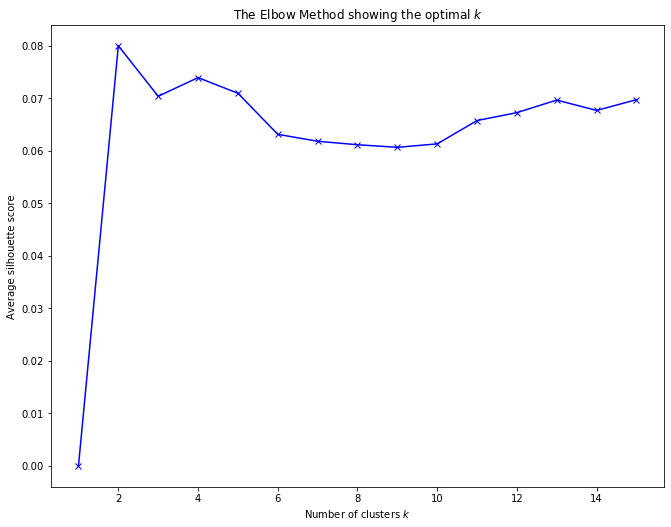

In [17]:
#your code here
sil_s = [0]
for i in range(2,16):
    ms_kmeans = KMeans(n_clusters=i, init='random', n_init=46, random_state=109).fit(df_post_10)
    sil_s.append(silhouette_score(df_post_10.values, ms_kmeans.labels_))

plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), sil_s, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average silhouette score')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

(c) Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,15\}$. Plot the results. 

In [18]:
#your code here
gs_obj = OptimalK()

n_clusters = gs_obj(df_post_10.values, n_refs=50, cluster_array=np.arange(1, 16))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  15


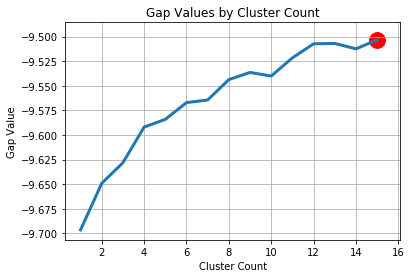

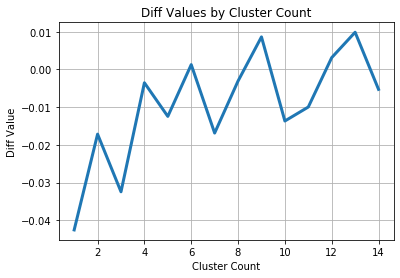

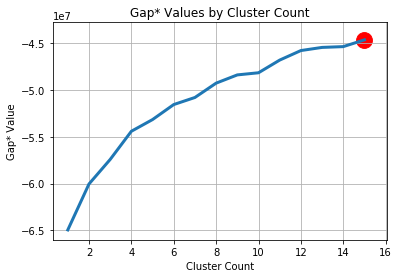

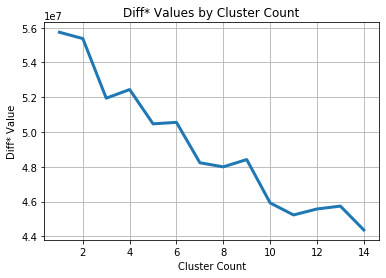

In [19]:
gs_obj.plot_results()

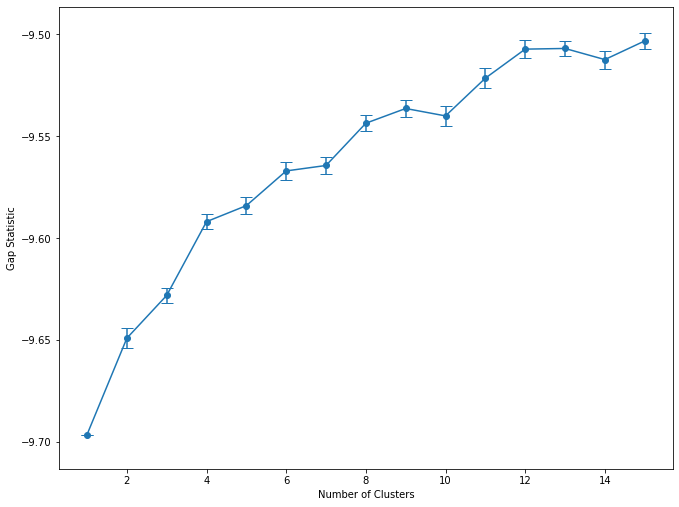

In [20]:
def display_gapstat_with_errbars(gap_df):
    gaps = gap_df["gap_value"].values
    diffs = gap_df["diff"]
    
    err_bars = np.zeros(len(gap_df))
    err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

    plt.figure(figsize=(11,8.5))
    plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
    plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Gap Statistic")
    plt.show()
    
display_gapstat_with_errbars(gs_obj.gap_df)

(d) After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

The elbow method by calculating the within-cluster variations for k from 1 to 15 shows that the optimal k valus should be between 4 and 7, where the variation reduction starting to decrease. The silhouette score suggest that 2 clusters is the best choice for k, however, for k = 2,4,5, the differences are not large. Last figure showing the results of gap statistics suggests that the optimal k should be k=6 by using the critira $Gap(k)>Gap(k+1)-s_{k+1}$.

Taking the analysis in the previous section into account, we can still k=5 as the optimal k.

<div class='exercise'> <b> Problem 3: Alternative Algorithms  </b> </div>

(e) Run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. Running the algorithm may take up to 5-10 minutes.

In [21]:
df_post = df.iloc[:,2:]

In [22]:
def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df_post)
    distances, indices = fitted_neigbors.kneighbors(df_post)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

Use twice the number of the features as the min_samples, which is 48 here:

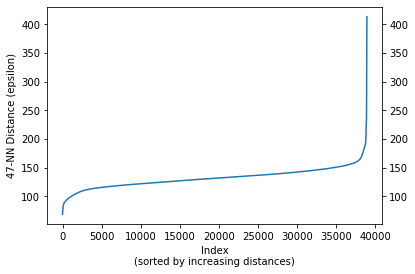

In [23]:
plot_epsilon(df_post, 48)

Based on the figure above, the turning point for choosing the optimal epsilon is epsilon = 160, so we are using this value in the following code:

In [24]:
fitted_dbscan = DBSCAN(eps=160).fit(df_post)

In [25]:
db_labels = pd.DataFrame(fitted_dbscan.labels_,columns = ['labels'])

In [26]:
db_labels['labels'].value_counts()

 0    38795
-1      139
 2        5
 1        4
Name: labels, dtype: int64

There are 3 clusters found here, and 139 data points are considered as noise.

In [27]:
df_post['db_cluster'] = fitted_dbscan.labels_

In [28]:
def plot_clusters_db(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5', 'db_cluster'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_columns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(frac=1, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index ### New statement
    
    # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[pca_sample.index, "Cluster14"]
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[pca_sample.index, "Cluster5"]
    if 'db_cluster' in full_data.columns.values:
        pca_sample['db_cluster'] = full_data.loc[pca_sample.index, "db_cluster"]
    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

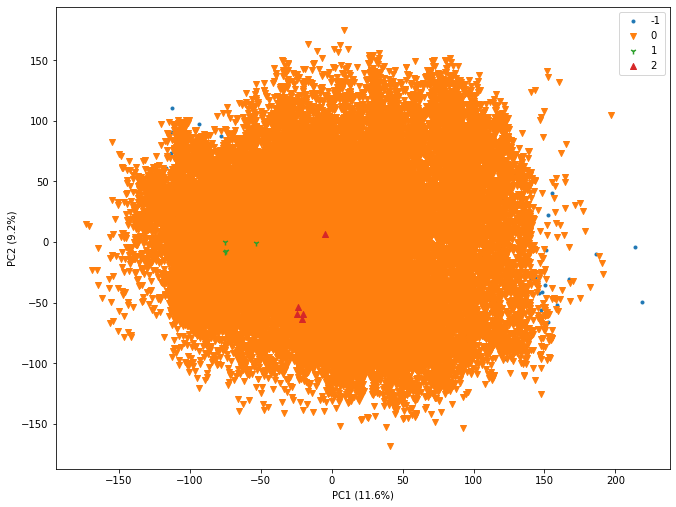

In [29]:
# plot and exam
plot_clusters_db(df_post, 'db_cluster', False)

In [30]:
indexNames = df_post[df_post['db_cluster'] == -1 ].index
df_post.drop(indexNames , inplace=True)

In [31]:
df_post.head()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,db_cluster
0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,-55.674024,86.175444,...,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124,0
1,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,-55.975665,74.817984,...,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553,0
2,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,8.120352,52.961965,...,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279,0
3,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,1.064904,80.854870,...,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147,0
4,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,32.076937,95.211973,...,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243,0


In [32]:
silhouette_score(df_post.iloc[:,:-1], df_post['db_cluster'])

0.06463493561685353

The sihouette score for the DBSCAN algrithom is 0.0646, which is evern smaller than the K-means using cluster number 14 and 5. It makes sense, since we can tell the clustering doesn't do a good job here because the number of data points in each cluster is distributed extremely uneven. Most of the data points have been clustered into the same group (cluster 1) while other 2 clusters only have 5 and 4 data points, which seems very unreasonable. Overall, DBSCAN did a poor job here for clustering.

(f) Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

In [33]:
df_post = df.iloc[:,2:]

In [34]:
#your code here
dist_mat = pdist(df_post, metric="euclidean")
ward_data = hac.ward(dist_mat)

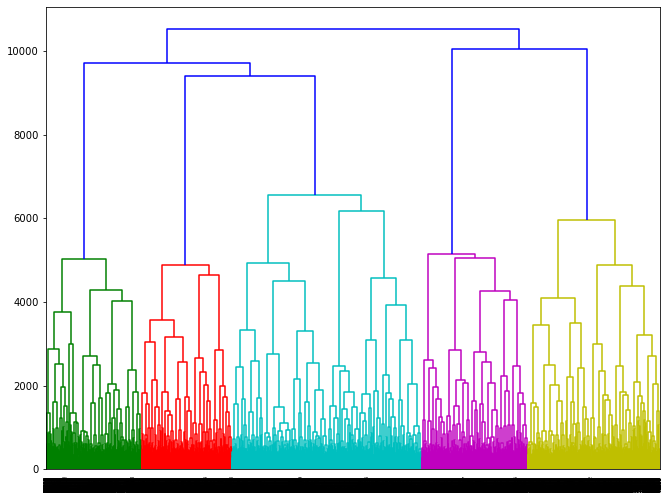

In [36]:
plt.figure(figsize=(11,8.5))
hac.dendrogram(ward_data);
plt.show()

Based on the dendrogram, we can roughly estimate that the optimal number of clusters we should choose is 5. 

In [37]:
#your code here
scores = []
num_cluster = []
for t in np.arange(2,16):
    labellings = hac.fcluster(ward_data, t=t, criterion='maxclust')
    score = silhouette_score(df_post.iloc[:,:-1], labellings)
    scores.append(score)
    num_cluster.append(len(set(labellings)))

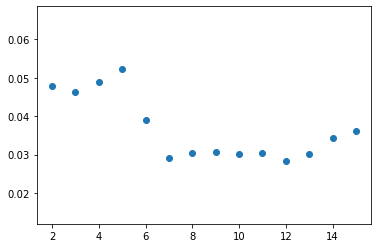

In [38]:
plt.scatter(num_cluster, scores)

By calculating the silhouette score by using different number of clusters, we can see that k=5 gives the highest score, so that we can choose k=5 as the optimal number of clusters.

(g) Overall, what do you conclude about the number and kind of clusters in this data set?

Based on the results of trying K-means using k=5 and k=14, we concluded that k=5 is better than k=14. The elbow method by calculating the within-cluster variations for k from 1 to 15 shows that the optimal k valus should be between 4 and 7, the silhouette score suggests that k should be 2,4,5, and the gap statistic suggests k=6 is the optimal choice. Finally, the DBSCAN method performs poorly on this data set and the HAC method suggests k=5 is the optimal choice for the number of clusters.

In summary, different methods seem suggest that 5 should be the optimal number of clusters. This is a reasonable choice since it reflects that there are 5 distinct hand postures. The kind of clusters are 5 different hand postures.

In [39]:
labellings = hac.fcluster(ward_data, t=5, criterion='maxclust')

In [40]:
from collections import Counter
Counter(labellings)

Counter({1: 6059, 5: 8397, 2: 5756, 4: 6706, 3: 12025})

In [41]:
Counter(df['Class'])

Counter({1: 52, 2: 14668, 3: 3556, 4: 5767, 5: 14900})

In addition, we can see that the distribution of the original classes in the data set does not exactly match the results of our HAC method, so some data points are "misplaced" by the HAC method.